In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV数据

In [3]:
data1 = pd.read_csv('data2.csv',header=None)
data1.columns = ['X1', 'X2', 'Labels']

# 整理数据

In [4]:
X = np.hstack((np.array(data1['X1']).reshape(-1,1),np.array(data1['X2']).reshape(-1,1)))
X = np.hstack((np.ones([X.shape[0],1]),X))
Y = np.array(data1['Labels']).reshape(-1,1)
#print(X,Y)

# 初始化权重

In [5]:
W = np.zeros([3,1])
#print(W)

# Cyclic 处理线性可分数据

In [6]:
def linearly_separable(X,Y,W,iter_num=1000):
    
    for i in range(iter_num):
        flag = False
        for j in range(X.shape[0]):
            pred = np.sign(np.dot(X[j:j+1,:],W))
            #print(pred,Y[j])
            if (pred != Y[j]):
                if (flag == False):
                    flag = True
                W += Y[j]*X[j:j+1,:].reshape(3,1)
                #print(W)
        if flag == False:
            print('All classified True')
            break            
        else:
            print('Not All is True')  
    return W

# 算法学习：Packet 处理线性不可分数据

In [7]:
def error_count(X,Y,w):
    count = 0
    for j in range(X.shape[0]):
        pred = np.sign(np.dot(X[j],w))
        if (pred != Y[j]):
            count += 1
    return count


In [8]:
def linearly_nonseparable(X,Y,W,iter_num=1000,min_change=0.01):
    weight = [W]
    for i in range(iter_num):
        flag = False
        for j in range(X.shape[0]):
            pred = np.sign(np.dot(X[j],W))
            if (pred != Y[j]):
                flag = True
                W_new = W + Y[j]*X[j].reshape(3,1)
                if error_count(X,Y,W_new)<error_count(X,Y,W):
                    W = W_new
                    weight.append(W)
        if (flag == False):
            print('All is True')
            break
        change = np.linalg.norm(weight[-1] - weight[-2]) / (np.linalg.norm(weight[-1]) + np.linalg.norm(weight[-2]))
        if (change<min_change):
            print('Already Converged')
            break
    return W                

# 训练：先用Cyclic 进行预处理，然后用Packet处理不可分数据

In [9]:
W1 = linearly_separable(X, Y, W, iter_num=100)
print(W1)
W2 = linearly_nonseparable(X, Y, W1, iter_num=50000)
print(W2)

Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All is True
Not All 

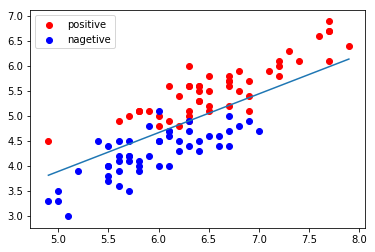

In [10]:
x1min = np.amin(data1['X1'])
x1max = np.amax(data1['X1'])
#画图
x1 = np.array([x1min, x1max])
x2 = -(x1 * W2[1,0] + W2[0,0]) / W2[2,0]
plt.figure
plt.scatter(data1['X1'][0:50],data1['X2'][0:50],c='red')
plt.scatter(data1['X1'][50:],data1['X2'][50:],c='blue')
plt.legend(['positive','nagetive'])

plt.plot(x1, x2)
plt.show()